In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")



In [62]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [63]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [64]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [66]:
df_train[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [67]:

#cabin information is not usable and lots of null value there so we droping cabin colum

#df_test.drop("Cabin",axis=1,inplace=True)
#df_train.drop("Cabin",axis=1,inplace=True)


In [68]:
# we have check null value in age


#print(df_train["Age"].isnull().sum())
#print(df_test["Age"].isnull().sum())

#not accurately fill null age just i simply do forward fill which fill ref of forward age

df_train.fillna(method="ffill",inplace=True)
df_test.fillna(method="ffill",inplace=True)
df_test.isnull().sum()


PassengerId     0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          12
Embarked        0
dtype: int64

In [69]:
df_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.42,1.0
17,13.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
60,45.50,0.0
26,20.50,0.0
40,30.50,0.0


In [70]:
df_train.head(5) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S


In [71]:
df_train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [72]:
df_train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.556213
1,Q,0.397436
2,S,0.336957


In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train["Sex"]= le.fit_transform(df_train["Sex"])
print(df_train["Sex"])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32


In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_test["Sex"]= le.fit_transform(df_test["Sex"])
print(df_test["Sex"])

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int32


In [75]:
df_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

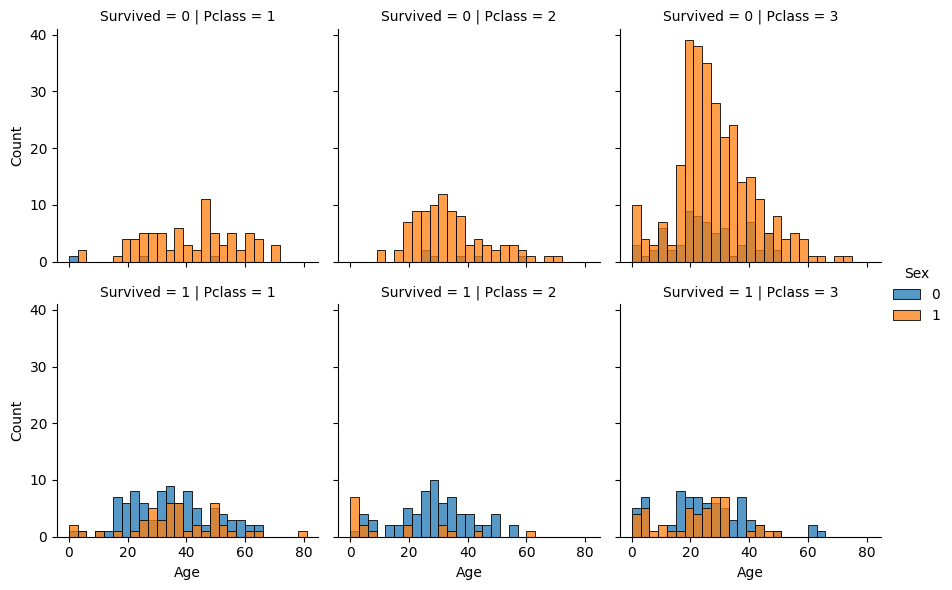

In [76]:
f=sns.FacetGrid(data=df_train,col='Pclass', row='Survived',hue="Sex")
f.map_dataframe(sns.histplot,"Age",binwidth=3, binrange=(0, 80))
f.add_legend()

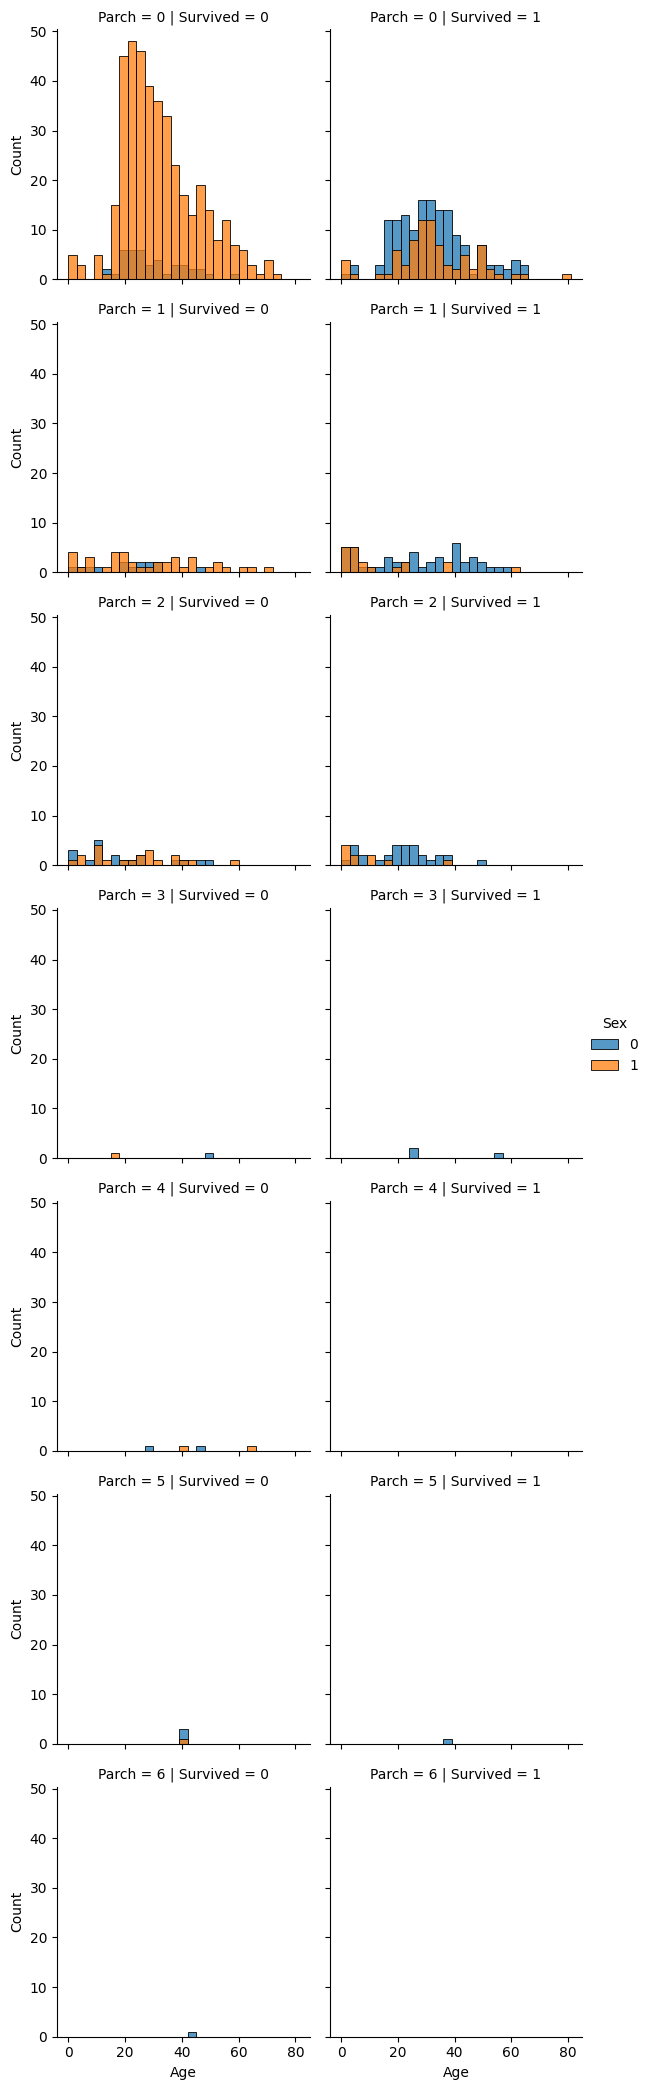

In [77]:
f=sns.FacetGrid(data=df_train,col='Survived', row='Parch',hue="Sex")
f.map_dataframe(sns.histplot,"Age",binwidth=3, binrange=(0, 80))
f.add_legend()

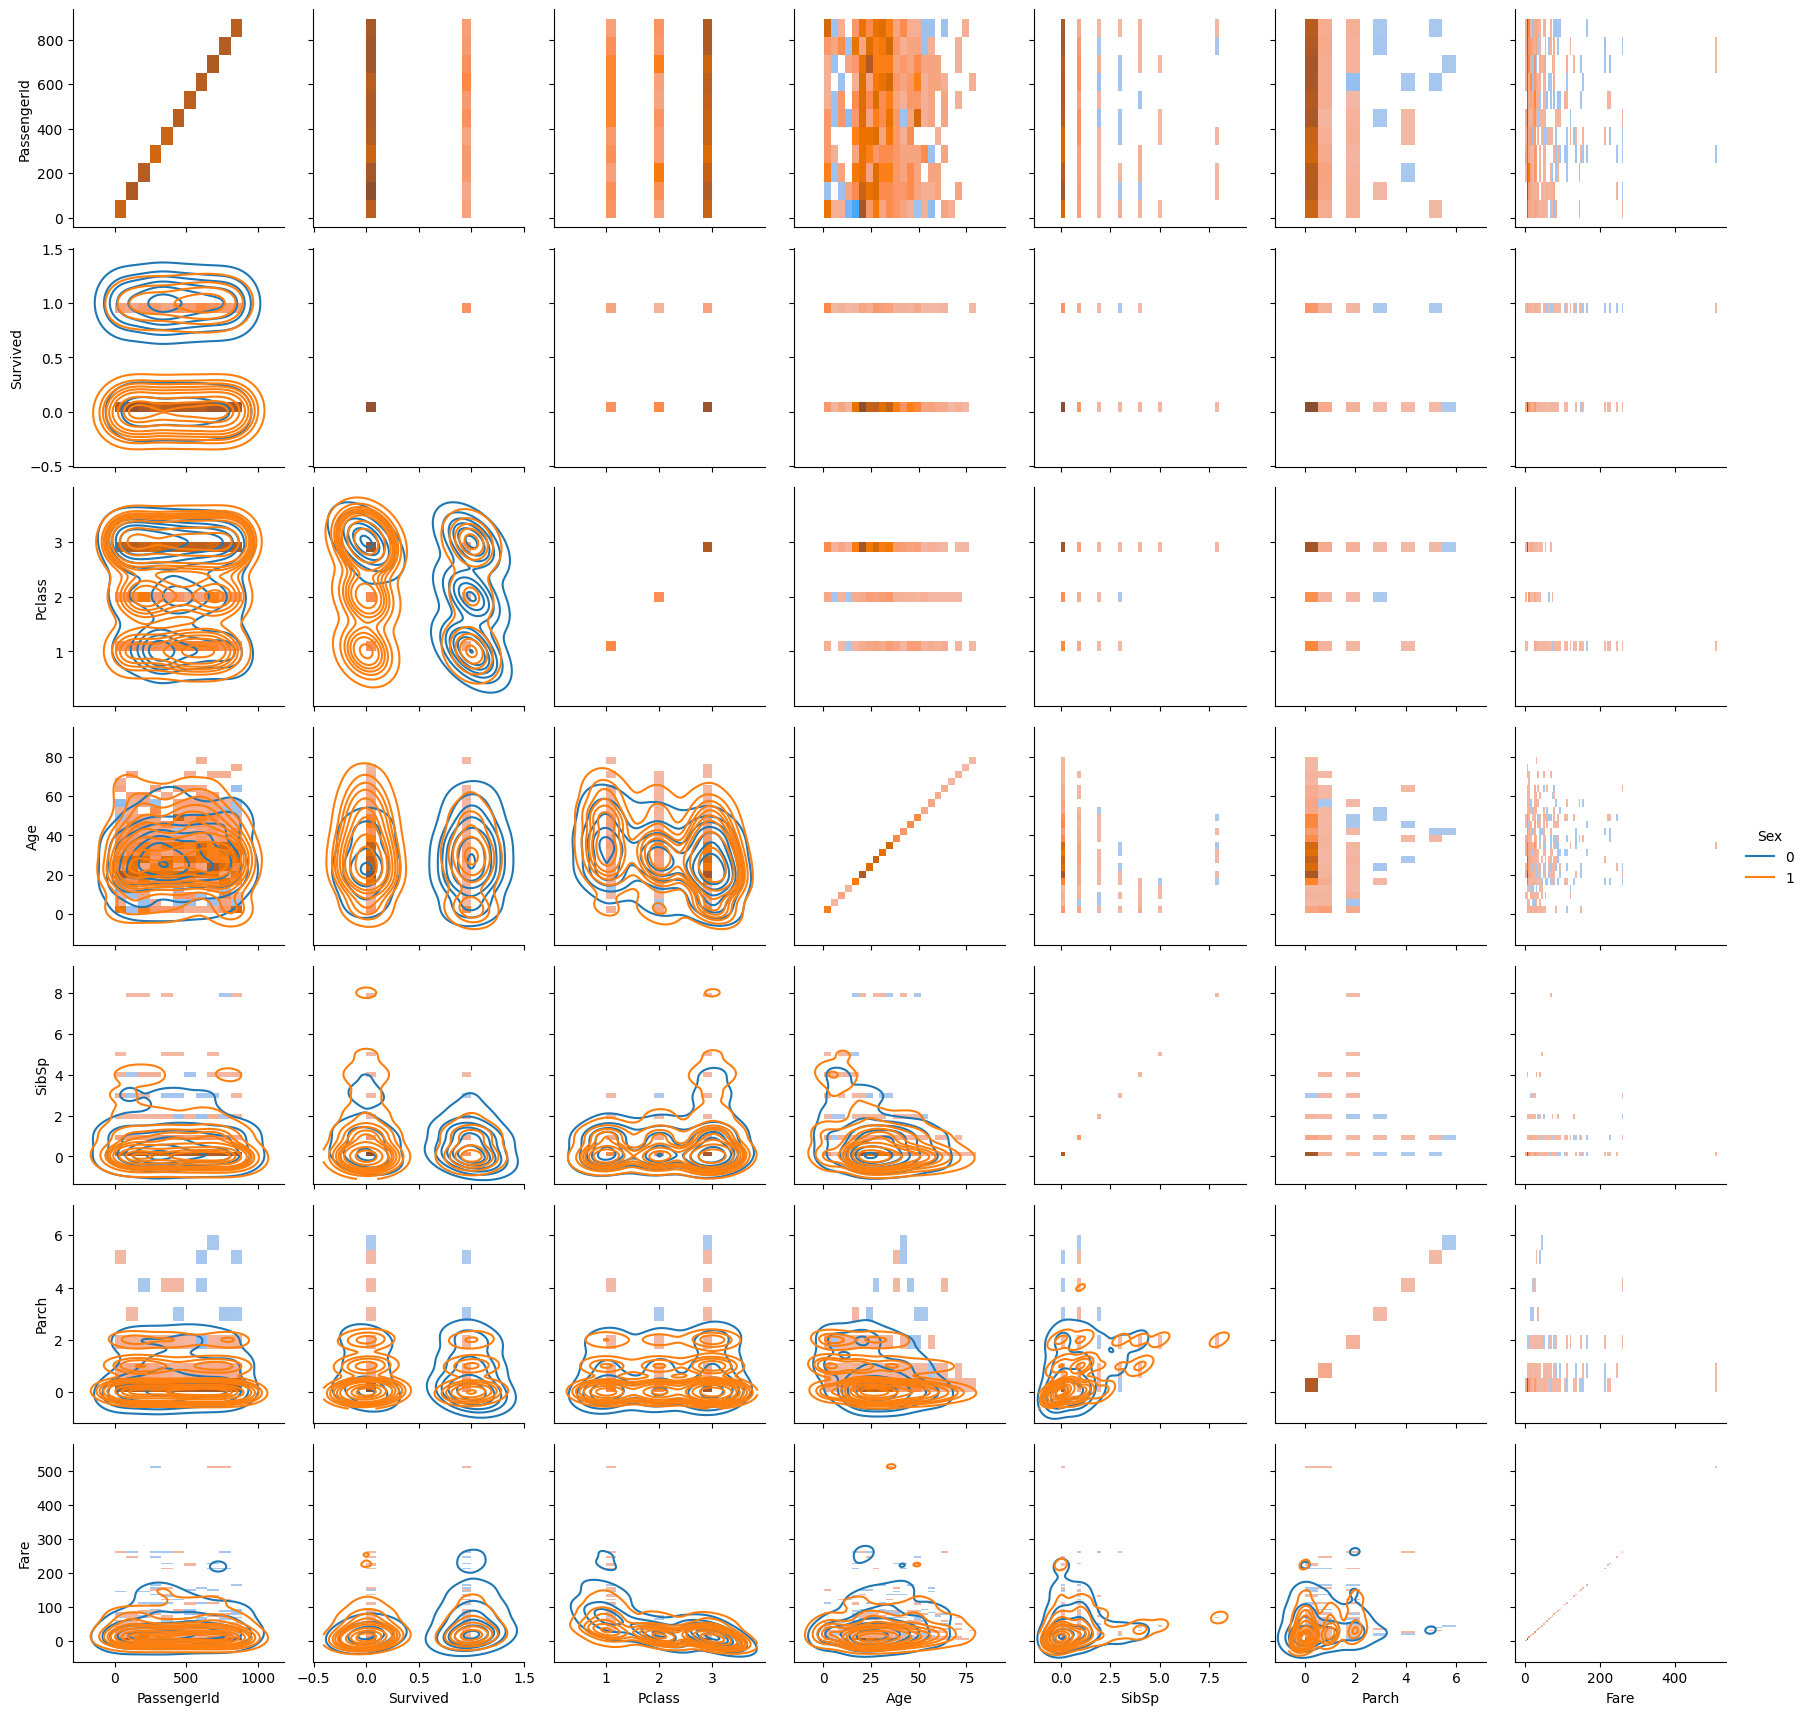

In [78]:
p=sns.PairGrid(df_train,hue="Sex")
p.map(sns.histplot)
p.map_diag(sns.scatterplot)
p.map_lower(sns.kdeplot)
p.add_legend()


c:\Users\BitCoding\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\BitCoding\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


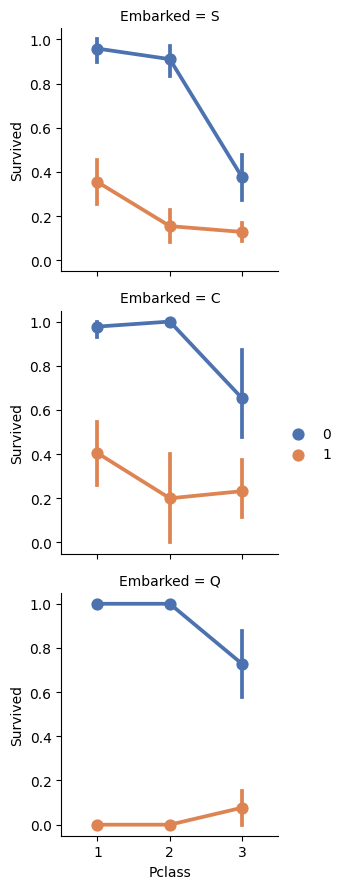

In [79]:
grid = sns.FacetGrid(df_train, row='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

c:\Users\BitCoding\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


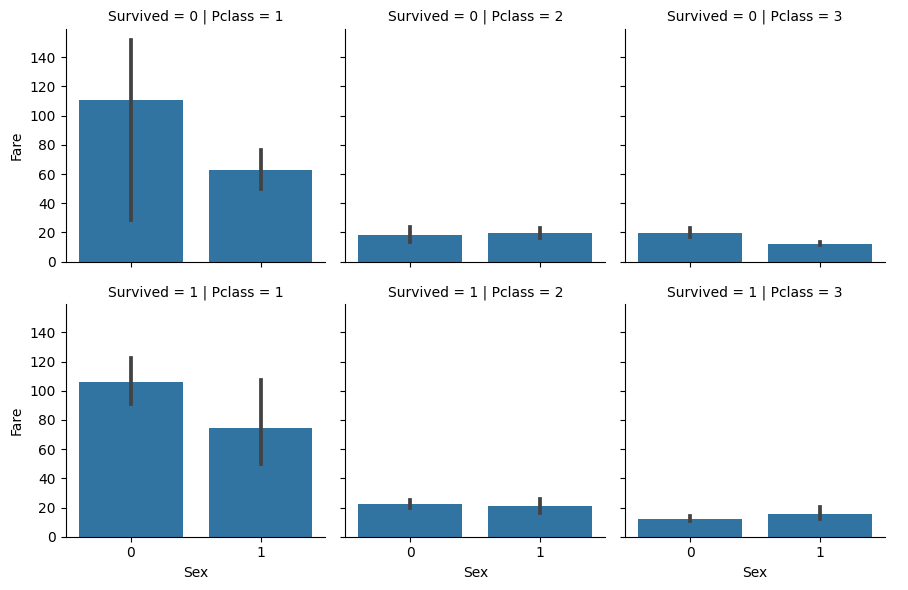

In [80]:
f=sns.FacetGrid(df_train,row="Survived",col="Pclass")
f.map(sns.barplot,"Sex","Fare",alpha=1)
f.add_legend()

In [81]:
df_train[["Pclass","Age","Survived","Parch"]].groupby(["Survived"]).mean()

,Pclass,Age,Parch
Survived,,,
0,2.531876,30.33439,0.329690
1,1.950292,28.37307,0.464912


In [82]:
train_x = df_train[["Pclass", "Sex"]]
train_x.head()

,Pclass,Sex
0,3,1
1,1,0
2,3,0
3,1,0
4,3,1


In [83]:
train_y = df_train[["Survived"]]
train_y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [84]:
tr_x, cv_x, tr_y, cv_y   = train_test_split(train_x, train_y, test_size = 0.30)
print(tr_x.head())
print(tr_y.head())

     Pclass  Sex
502       3    0
388       3    1
673       2    1
698       1    1
884       3    1
     Survived
502         0
388         0
673         1
698         0
884         0


In [91]:
rf = RandomForestClassifier()
# Fitting and training the above called algorithm
rf.fit(tr_x, tr_y)

pr_y=rf.predict(cv_x)
print("accuracy of logistic regression is",accuracy_score(pr_y,cv_y))
print(classification_report(pr_y,cv_y))

accuracy of logistic regression is 0.7649253731343284
              precision    recall  f1-score   support

           0       0.99      0.72      0.84       221
           1       0.42      0.96      0.59        47

    accuracy                           0.76       268
   macro avg       0.71      0.84      0.71       268
weighted avg       0.89      0.76      0.79       268



C:\Users\BitCoding\AppData\Local\Temp\ipykernel_6560\2883779045.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(tr_x, tr_y)


In [88]:
lgr = LogisticRegression()
lgr.fit(tr_x, tr_y)

pr_y=lgr.predict(cv_x)
print("accuracy of logistic regression is",accuracy_score(pr_y,cv_y))
print(classification_report(pr_y,cv_y))

accuracy of logistic regression is 0.7873134328358209
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       175
           1       0.67      0.76      0.71        93

    accuracy                           0.79       268
   macro avg       0.77      0.78      0.77       268
weighted avg       0.80      0.79      0.79       268



c:\Users\BitCoding\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
